# Reproducing test score graphics from The Dallas Morning News' investigation of TAKS scores

While text-based analysis can take you far, a good graphic can help you see patterns in your data.

<p class="reading-options">
  <a class="btn" href="/dmn-texas-school-cheating/texas-school-cheating-graph-reproductions">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/dmn-texas-school-cheating/notebooks/Texas School Cheating - Graph Reproductions.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/dmn-texas-school-cheating/notebooks/Texas School Cheating - Graph Reproductions.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **cfy04e4.dat:** 2004 fourth-grade TAKS scores - standardized test scores for 2004's fourth-graders
* **cfy03e3.dat:** 2003 third-grade TAKS scores - standardized test scores for 2003's third-graders
* **cfy04e5.dat:** 2004 fifth-grade TAKS scores - standardized test scores for 2004's fifth-graders
* **cfy04e3.dat:** 2004 third-grade TAKS scores - standardized test scores for 2004's third-graders


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/dmn-texas-school-cheating/data/cfy04e4.dat -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/dmn-texas-school-cheating/data/cfy03e3.dat -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/dmn-texas-school-cheating/data/cfy04e5.dat -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/dmn-texas-school-cheating/data/cfy04e3.dat -P data

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

# 2003 third-grade reading scores vs 2004 fourth-grade reading scores

We'll read in two years of data and combine them, roughly tracking students at the same school as they move between third and fourth grade.

From The Dallas Morning News:

> Harrell Budd scored poorly in third and fifth grade. But its fourth-grade reading scores were among the best in the state

We are able to highlight Harrell Budd using its campus code of `57905115`. You have also filtered by name, etc.

In [48]:
df1 = pd.read_csv("data/cfy04e4.dat", usecols=['r_all_rs', 'CAMPUS', 'CNAME'])
df1 = df1.set_index('CAMPUS').add_suffix('_fourth')
df2 = pd.read_csv("data/cfy03e3.dat", usecols=['r_all_rs', 'CAMPUS'])
df2 = df2.set_index('CAMPUS').add_suffix('_third')

merged = df1.join(df2)
merged.head(3)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third
CAMPUS,,,
1902103,CAYUGA EL,2392.0,2330.0
1903101,ELKHART EL,2263.0,2285.0
1904102,FRANKSTON EL,2242.0,2299.0


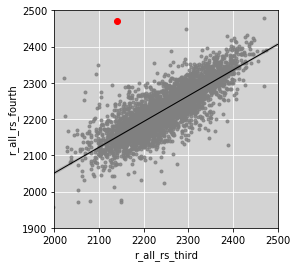

In [49]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(2000, 2500)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns.regplot('r_all_rs_third',
            'r_all_rs_fourth',
            data=merged,
            marker='.', 
            line_kws={"color": "black", "linewidth": 1},
            scatter_kws={"color": "grey"})

highlight = merged.loc[57905115]
plt.plot(highlight.r_all_rs_third, highlight.r_all_rs_fourth, 'ro')

In [50]:
highlight

CNAME_fourth       HARRELL BUDD EL
r_all_rs_fourth               2470
r_all_rs_third                2140
Name: 57905115, dtype: object

# 2004 fifth-grade math scores vs fifth-grade reading scores

This time we'll only read in one year of data - 2004 - and compare the math and reading scores at each school.From The Dallas Morning News:

> Sanderson's fourth-grade math scores were exceedingly low. Its fifth-grade scores were No. 1 in the state.

We are able to highlight Sanderson using its campus code of `101912236`. You have also filtered by name, etc.

In [51]:
df = pd.read_csv("data/cfy04e5.dat", usecols=['m_all_rs', 'r_all_rs', 'CAMPUS', 'CNAME'])
df = df.set_index('CAMPUS').add_suffix('_fifth')
df.head(3)

,CNAME_fifth,r_all_rs_fifth,m_all_rs_fifth
CAMPUS,,,
1902103,CAYUGA EL,2308.0,2317.0
1903101,ELKHART EL,2193.0,2153.0
1904102,FRANKSTON EL,2288.0,2256.0


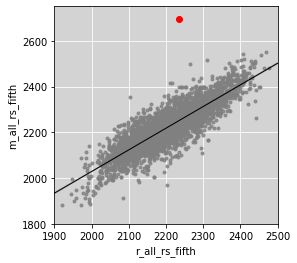

In [52]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(1900, 2500)
ax.set_ylim(1800, 2750)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns.regplot('r_all_rs_fifth',
            'm_all_rs_fifth',
            data=df,
            marker='.', 
            line_kws={"color": "black", "linewidth": 1},
            scatter_kws={"color": "grey"})

highlight = df.loc[101912236]
plt.plot(highlight.r_all_rs_fifth, highlight.m_all_rs_fifth, 'ro')

In [53]:
highlight

CNAME_fifth       SANDERSON EL
r_all_rs_fifth            2235
m_all_rs_fifth            2696
Name: 101912236, dtype: object

# 2004 third-grade reading scores vs 2004 fourth-grade reading scores

This time we'll see how third- and fourth-graders performed at the same school in the same year. From The Dallas Morning News:

> Garza's third-grade students, most of whom have problems with English, finished in the top 2 percent of the state in reading.

In [57]:
df1 = pd.read_csv("data/cfy04e4.dat", usecols=['r_all_rs', 'CAMPUS', 'CNAME'])
df1 = df1.set_index('CAMPUS').add_suffix('_fourth')
df2 = pd.read_csv("data/cfy04e3.dat", usecols=['r_all_rs', 'CAMPUS'])
df2 = df2.set_index('CAMPUS').add_suffix('_third')
merged = df1.join(df2)
merged.head(3)

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third
CAMPUS,,,
1902103,CAYUGA EL,2392.0,2410.0
1903101,ELKHART EL,2263.0,2256.0
1904102,FRANKSTON EL,2242.0,2284.0


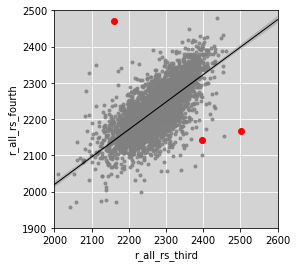

In [58]:
fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(2000, 2600)
ax.set_ylim(1900, 2500)
ax.set_facecolor('lightgrey')
ax.grid(True, color='white')
ax.set_axisbelow(True)

sns.regplot('r_all_rs_third',
            'r_all_rs_fourth',
            data=merged,
            marker='.', 
            line_kws={"color": "black", "linewidth": 1},
            scatter_kws={"color": "grey"})

highlight = merged.loc[[31901124, 57905115, 57920108]]
plt.plot(highlight.r_all_rs_third, highlight.r_all_rs_fourth, 'ro')

In [59]:
highlight

,CNAME_fourth,r_all_rs_fourth,r_all_rs_third
CAMPUS,,,
31901124,GARZA EL,2142.0,2398.0
57905115,HARRELL BUDD EL,2470.0,2160.0
57920108,WILMER EL,2168.0,2501.0
